In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import category_scatter
from sklearn import model_selection, linear_model, feature_selection, metrics
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statistics
import math

In [2]:
# Data Cleaning and Exploration for game_details file
# Done by Noah Cyr

# Data Cleaning and Preprocessing

In [3]:
df0 = pd.read_csv('games_details.csv') #reading csv file
df0['GAME_ID'] = df0['GAME_ID'].astype(str) #making values in the GAME_ID column strings
df0['TEAM_ID'] = df0['TEAM_ID'].astype(str) #making values in the TEAM_ID column strings
df0 #displaying table

C:\Users\noahc\AppData\Local\Temp\ipykernel_38908\2509335245.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df0 = pd.read_csv('games_details.csv') #reading csv file


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,...,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,...,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,...,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,...,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668623,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,NaN,19,...,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN
668624,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,NaN,23,...,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN
668625,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,NaN,15,...,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN
668626,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,NaN,NaN,NaN,19,...,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,NaN


In [4]:
missing_count = df0.isnull().sum() #determining how many missing cells there are in each column
missing_count #displaying these missing counts

GAME_ID                   0
TEAM_ID                   0
TEAM_ABBREVIATION         0
TEAM_CITY                 0
PLAYER_ID                 0
PLAYER_NAME               0
NICKNAME             615591
START_POSITION       412863
COMMENT              558939
MIN                  109690
FGM                  109690
FGA                  109690
FG_PCT               109690
FG3M                 109690
FG3A                 109690
FG3_PCT              109690
FTM                  109690
FTA                  109690
FT_PCT               109690
OREB                 109690
DREB                 109690
REB                  109690
AST                  109690
STL                  109690
BLK                  109690
TO                   109690
PF                   109690
PTS                  109690
PLUS_MINUS           133351
dtype: int64

In [5]:
# Selecting every column besides 'NICKNAME', 'START_POSITION', 'COMMENT', and 'PLUS_MINUS'
## first three columns listed have many missing data points and the information they provide will not be needed for this analyzation
## the plus-minus column has more missing data points than the other stat columns, unsure why, but removed that column as will not be needed as well
df0a = df0.iloc[:, 0:6]
df0b = df0.iloc[:, 9:28]

df1 = pd.concat([df0a, df0b], axis=1) #combining the dataframes back into one
df1.shape

(668628, 25)

In [6]:
# Removing all rows with at least one null value
## these are players listed on the roster for a game, but did not play due to the coach's decision, injury, etc. Count: 109,690
df2 = df1.dropna(axis=0)

# This player (Boris Diaw) was incorrectly listed as a player for a game between the Mavs and Pistons, while he was on the Suns
## likely due to a miss input, as the Pistons team id ends in a '65' and the Suns ends in a '56' 
df2 = df2.drop([240939]) 

df2.shape

(558937, 25)

In [7]:
df3 = df2[['GAME_ID', 'TEAM_ID', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTA', 'FTM', 'REB', 'AST', 'TO', 'PTS']] #selecting only stats we will need

# No file in any dataset has a team turnover stat, but the 'games_details.csv' has player turnover stats for each game
## So this part calculates a team TOV stat by summing player turnover stats - for simplicity's sake, it also sums other team stats
## Grouped by the GAME_ID and TEAM_ID, so each team has a set of stats for every game. There be 2 of every GAME_ID, one for each team
agg_funcs = {'FGM': 'sum', 'FGA': 'sum', 'FG3M': 'sum', 'FG3A': 'sum', 'FTA': 'sum', 'FTM': 'sum', 'REB': 'sum', 'AST': 'sum', 'TO': 'sum', 'PTS': 'sum'}
df3 = df3.groupby(['GAME_ID', 'TEAM_ID'], as_index=False).agg(agg_funcs)

df3["AST/TO"] = df3['AST'] / df3['TO'] #adding the assist to turnover stat
df3["TEAM_FG%"] = df3['FGM'] / df3['FGA'] #adding the team FG% stat
df3["TEAM_FG3%"] = df3['FG3M'] / df3['FG3A'] #adding the team FG3% stat
df3["TEAM_FT%"] = df3['FTM'] / df3['FTA'] #adding the team FT% stat
df3["TEAM_TS%"] = (df3['PTS']) / (2 * (df3['FGA'] + (0.44 * df3['FTA']))) #adding the team TS%

df3

,GAME_ID,TEAM_ID,FGM,FGA,FG3M,FG3A,FTA,FTM,REB,AST,TO,PTS,AST/TO,TEAM_FG%,TEAM_FG3%,TEAM_FT%,TEAM_TS%
0,10300001,1610612742,34.0,76.0,2.0,8.0,30.0,15.0,38.0,20.0,18.0,85.0,1.111111,0.447368,0.250000,0.500000,0.476457
1,10300001,1610612762,32.0,70.0,1.0,7.0,34.0,25.0,41.0,23.0,18.0,90.0,1.277778,0.457143,0.142857,0.735294,0.529661
2,10300002,1610612749,32.0,75.0,2.0,13.0,40.0,28.0,43.0,20.0,24.0,94.0,0.833333,0.426667,0.153846,0.700000,0.507559
3,10300002,1610612763,40.0,81.0,4.0,15.0,34.0,21.0,48.0,25.0,25.0,105.0,1.000000,0.493827,0.266667,0.617647,0.547103
4,10300003,1610612739,38.0,77.0,4.0,6.0,29.0,20.0,52.0,25.0,25.0,100.0,1.000000,0.493506,0.666667,0.689655,0.557041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53041,52100131,1610612759,37.0,91.0,13.0,34.0,22.0,16.0,34.0,19.0,6.0,103.0,3.166667,0.406593,0.382353,0.727273,0.511522
53042,52100201,1610612737,39.0,80.0,9.0,31.0,22.0,20.0,42.0,15.0,13.0,107.0,1.153846,0.487500,0.290323,0.909091,0.596566
53043,52100201,1610612739,37.0,81.0,13.0,36.0,17.0,14.0,36.0,23.0,11.0,101.0,2.090909,0.456790,0.361111,0.823529,0.570750
53044,52100211,1610612740,43.0,88.0,6.0,22.0,25.0,13.0,54.0,20.0,8.0,105.0,2.500000,0.488636,0.272727,0.520000,0.530303


In [8]:
# Code create a column to determine if team won or loss game
lst0 = [] #empty list 
for i in range(0, len(df3.index) - 1): #iterate over rows:
    # Access the GAME_ID using df.iloc[i, 0] which means row 'i' and column '0' (the first column)
    if df3.iloc[i, 0] == df3.iloc[i + 1, 0]: #compare to the next GAME_ID
        # If the GAME_IDs are the same, compare the values in the PTS column
        if df3.iloc[i, 11] > df3.iloc[i + 1, 11]:
            #if the team first in the dataframe won, add 'W' 'L' to the list
            lst0.append(1)
            lst0.append(0)
        elif df3.iloc[i, 11] < df3.iloc[i + 1, 11]:
            #if the team second in the dataframe won, add 'L' 'W' to the list
            lst0.append(0)
            lst0.append(1)
        else:
            #if there's an error and the teams somehow tied, add '-1' '-1'
            lst0.append(-1)
            lst0.append(-1)

In [9]:
# Append the column of 0s and 1s to the dataframe
won = pd.DataFrame(lst0)
df3["Won?"] = won

lst1 = [] #empty list
# If value in the 'Won?' column equals -1, then add index to list
for i in range(0, len(df3.index) - 1):
    if df3.iloc[i, 17] == -1:
        lst1.append(i)

# 'lst1' contains rows whose game ended in a tie (there were 3 games, presumable to data collection error or missing players)
for x in lst1:
    df3 = df3.drop([x], inplace=False) #remove these rows

df3.index = range(len(df3)) #reset indices  
df3

,GAME_ID,TEAM_ID,FGM,FGA,FG3M,FG3A,FTA,FTM,REB,AST,TO,PTS,AST/TO,TEAM_FG%,TEAM_FG3%,TEAM_FT%,TEAM_TS%,Won?
0,10300001,1610612742,34.0,76.0,2.0,8.0,30.0,15.0,38.0,20.0,18.0,85.0,1.111111,0.447368,0.250000,0.500000,0.476457,0
1,10300001,1610612762,32.0,70.0,1.0,7.0,34.0,25.0,41.0,23.0,18.0,90.0,1.277778,0.457143,0.142857,0.735294,0.529661,1
2,10300002,1610612749,32.0,75.0,2.0,13.0,40.0,28.0,43.0,20.0,24.0,94.0,0.833333,0.426667,0.153846,0.700000,0.507559,0
3,10300002,1610612763,40.0,81.0,4.0,15.0,34.0,21.0,48.0,25.0,25.0,105.0,1.000000,0.493827,0.266667,0.617647,0.547103,1
4,10300003,1610612739,38.0,77.0,4.0,6.0,29.0,20.0,52.0,25.0,25.0,100.0,1.000000,0.493506,0.666667,0.689655,0.557041,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53035,52100131,1610612759,37.0,91.0,13.0,34.0,22.0,16.0,34.0,19.0,6.0,103.0,3.166667,0.406593,0.382353,0.727273,0.511522,0
53036,52100201,1610612737,39.0,80.0,9.0,31.0,22.0,20.0,42.0,15.0,13.0,107.0,1.153846,0.487500,0.290323,0.909091,0.596566,1
53037,52100201,1610612739,37.0,81.0,13.0,36.0,17.0,14.0,36.0,23.0,11.0,101.0,2.090909,0.456790,0.361111,0.823529,0.570750,0
53038,52100211,1610612740,43.0,88.0,6.0,22.0,25.0,13.0,54.0,20.0,8.0,105.0,2.500000,0.488636,0.272727,0.520000,0.530303,1


In [10]:
# Code to determine point differential compared to their opponent for every team in every game
lst2 = [] #empty list
for i in range(0, len(df3)): #iterate over rows:
    #if GAME_ID is equal to the previous row, calculate difference in points between this row and the previous row
    if df3.iloc[i, 0] == df3.iloc[i - 1, 0]:
        lst2.append(df3.iloc[i, 11] - df3.iloc[i - 1, 11])
    #else if GAME_ID is equal to the next row, calculate difference in points between this row and the next row
    elif df3.iloc[i, 0] == df3.iloc[i + 1, 0]:
        lst2.append(df3.iloc[i, 11] - df3.iloc[i + 1, 11])
    

# Append the column to the dataframe
pt_diff = pd.DataFrame(lst2)
df3["PT_DIFF"] = pt_diff

df3    

,GAME_ID,TEAM_ID,FGM,FGA,FG3M,FG3A,FTA,FTM,REB,AST,TO,PTS,AST/TO,TEAM_FG%,TEAM_FG3%,TEAM_FT%,TEAM_TS%,Won?,PT_DIFF
0,10300001,1610612742,34.0,76.0,2.0,8.0,30.0,15.0,38.0,20.0,18.0,85.0,1.111111,0.447368,0.250000,0.500000,0.476457,0,-5.0
1,10300001,1610612762,32.0,70.0,1.0,7.0,34.0,25.0,41.0,23.0,18.0,90.0,1.277778,0.457143,0.142857,0.735294,0.529661,1,5.0
2,10300002,1610612749,32.0,75.0,2.0,13.0,40.0,28.0,43.0,20.0,24.0,94.0,0.833333,0.426667,0.153846,0.700000,0.507559,0,-11.0
3,10300002,1610612763,40.0,81.0,4.0,15.0,34.0,21.0,48.0,25.0,25.0,105.0,1.000000,0.493827,0.266667,0.617647,0.547103,1,11.0
4,10300003,1610612739,38.0,77.0,4.0,6.0,29.0,20.0,52.0,25.0,25.0,100.0,1.000000,0.493506,0.666667,0.689655,0.557041,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53035,52100131,1610612759,37.0,91.0,13.0,34.0,22.0,16.0,34.0,19.0,6.0,103.0,3.166667,0.406593,0.382353,0.727273,0.511522,0,-10.0
53036,52100201,1610612737,39.0,80.0,9.0,31.0,22.0,20.0,42.0,15.0,13.0,107.0,1.153846,0.487500,0.290323,0.909091,0.596566,1,6.0
53037,52100201,1610612739,37.0,81.0,13.0,36.0,17.0,14.0,36.0,23.0,11.0,101.0,2.090909,0.456790,0.361111,0.823529,0.570750,0,-6.0
53038,52100211,1610612740,43.0,88.0,6.0,22.0,25.0,13.0,54.0,20.0,8.0,105.0,2.500000,0.488636,0.272727,0.520000,0.530303,1,4.0


# AST/TO Conjecture Analyzation

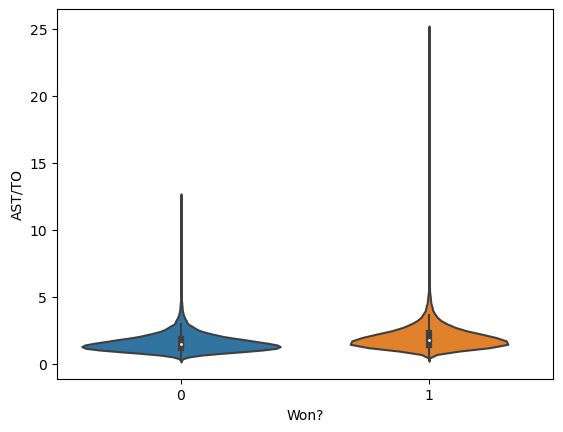

In [11]:
# Violin plot for AST/TO and wins and losses
sns.violinplot(data=df3, x='Won?', y='AST/TO') 
plt.show()

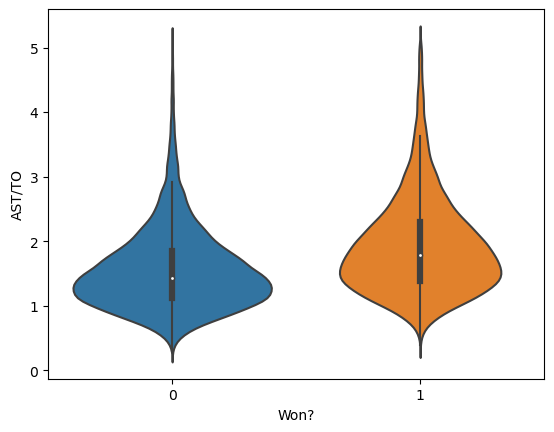

In [12]:
# From looking at previous violin plot, decided to remove all values above 5.15
df3_filtered = df3[df3['AST/TO'] <= 5.15]
sns.violinplot(data=df3_filtered, x='Won?', y='AST/TO') 
plt.show()

In [13]:
# Descriptive stats for the AST/TO of the winners 
wins = df3_filtered[df3_filtered['Won?'] == 1]
print("median  ", statistics.median(wins['AST/TO']))
print(wins['AST/TO'].describe())

median   1.7857142857142858
count    26327.000000
mean         1.917616
std          0.736545
min          0.391304
25%          1.388889
50%          1.785714
75%          2.300000
max          5.142857
Name: AST/TO, dtype: float64


In [14]:
# Descriptive stats for the AST/TO of the losers 
losses = df3_filtered[df3_filtered['Won?'] == 0]
print("median  ", statistics.median(losses['AST/TO']))
print(losses['AST/TO'].describe())

median   1.4375
count    26458.000000
mean         1.555595
std          0.630132
min          0.294118
25%          1.125000
50%          1.437500
75%          1.846154
max          5.142857
Name: AST/TO, dtype: float64


In [15]:
print("Correlation between AST/TO and PT_DIFF including outliers: ", df3['AST/TO'].corr(df3['PT_DIFF'], method='pearson'))

Correlation between AST/TO and PT_DIFF including outliers:  0.307031457876551


In [16]:
print("Correlation between AST/TO and PT_DIFF without outliers: ", df3_filtered['AST/TO'].corr(df3_filtered['PT_DIFF'], method='pearson'))

Correlation between AST/TO and PT_DIFF without outliers:  0.3213848033027629


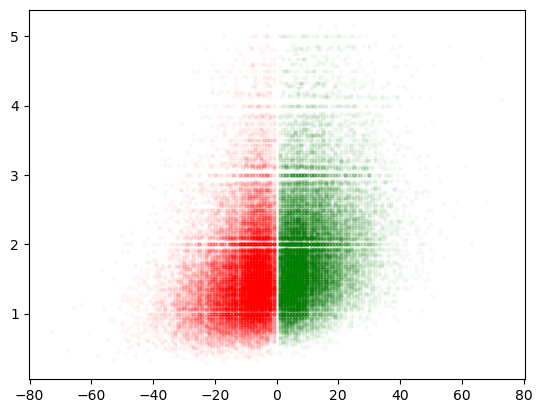

In [17]:
# Scatterplot of all teams by point differential by AST/TO
fig = category_scatter(x='PT_DIFF', y='AST/TO', label_col='Won?', data=df3_filtered, markers='.', colors=['red', 'green'], legend_loc=None, alpha=0.025)

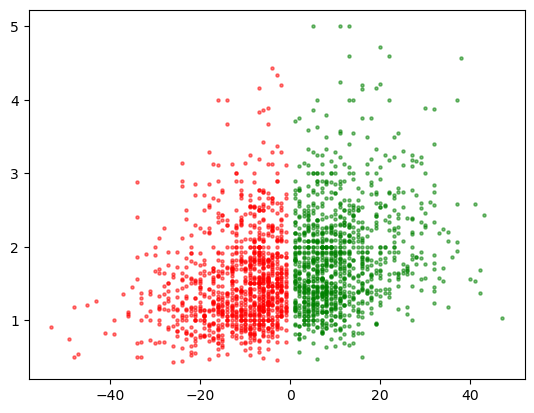

In [18]:
# Scatterplot of sample of teams by point differential by AST/TO
df3_filtered_sample = df3_filtered.sample(frac=.04) #creating sample of data
fig = category_scatter(x='PT_DIFF', y='AST/TO', label_col='Won?', data=df3_filtered_sample, markers='.', colors=['red', 'green'], legend_loc=None, alpha=0.5)

# Creating a Regression Model Conjecture Analyzation

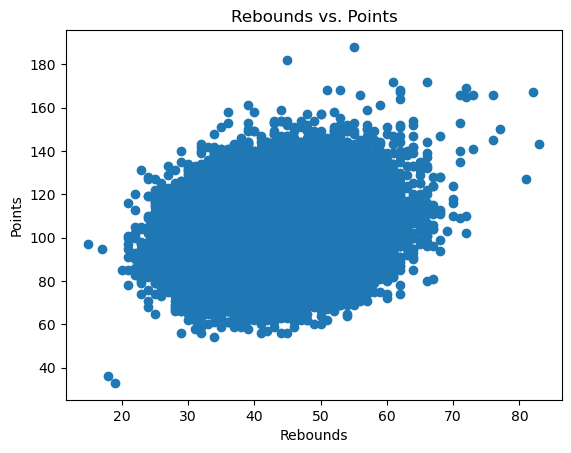

In [19]:
# Rebs vs. Pts Scatterplot
plt.scatter(x='REB', y='PTS', data=df3)
plt.xlabel('Rebounds')
plt.ylabel('Points')
plt.title("Rebounds vs. Points")
plt.savefig("REBvsPTS.png")

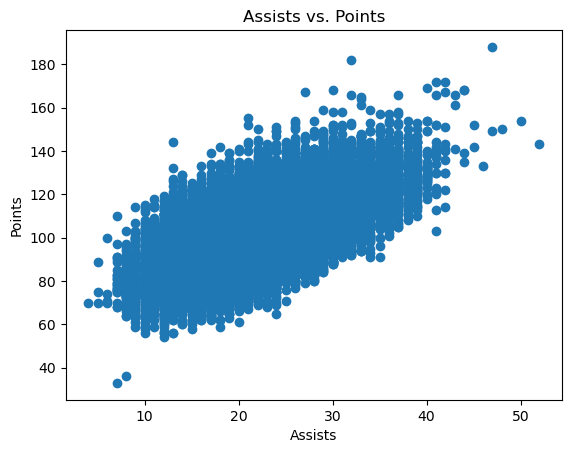

In [20]:
# Asts by Pts Scatterplot
plt.scatter(x='AST', y='PTS', data=df3)
plt.xlabel('Assists')
plt.ylabel('Points')
plt.title("Assists vs. Points")
plt.savefig("ASTvsPTS.png")

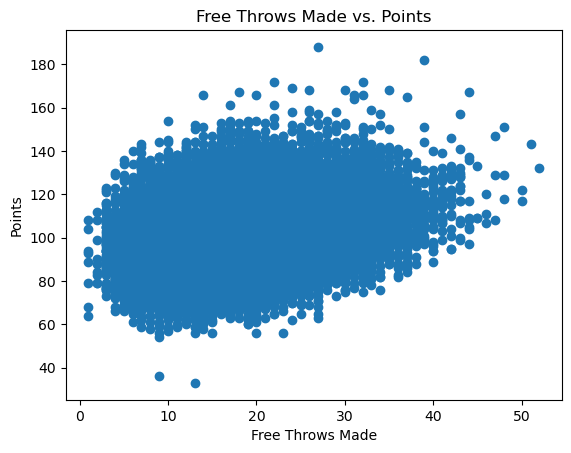

In [21]:
# FTM vs. Pts Scatterplot
plt.scatter(x='FTM', y='PTS', data=df3)
plt.xlabel('Free Throws Made')
plt.ylabel('Points')
plt.title("Free Throws Made vs. Points")
plt.savefig("FTMvsPTS.png")

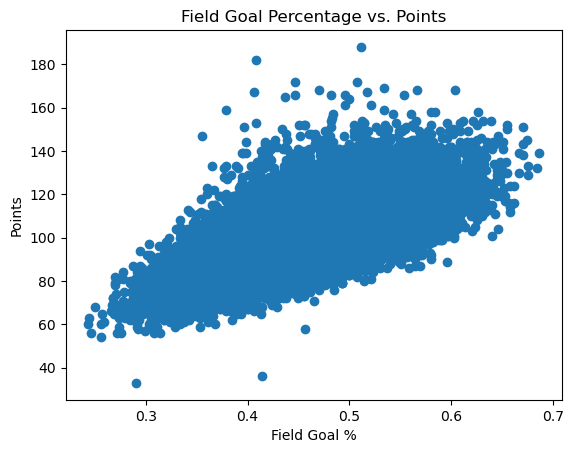

In [22]:
# FG% vs Pts Scatterplot
plt.scatter(x='TEAM_FG%', y='PTS', data=df3)
plt.xlabel('Field Goal %')
plt.ylabel('Points')
plt.title("Field Goal Percentage vs. Points")
plt.savefig("FGvsPTS.png")

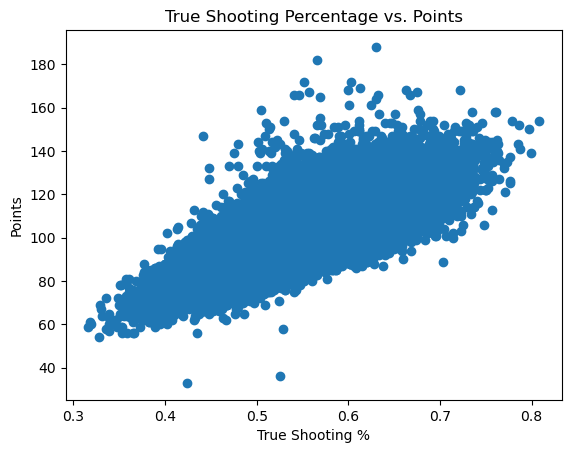

In [23]:
# TS% vs Pts Scatterplot
plt.scatter(x='TEAM_TS%', y='PTS', data=df3)
plt.xlabel('True Shooting %')
plt.ylabel('Points')
plt.title("True Shooting Percentage vs. Points")
plt.savefig("TSvsPTS.png")

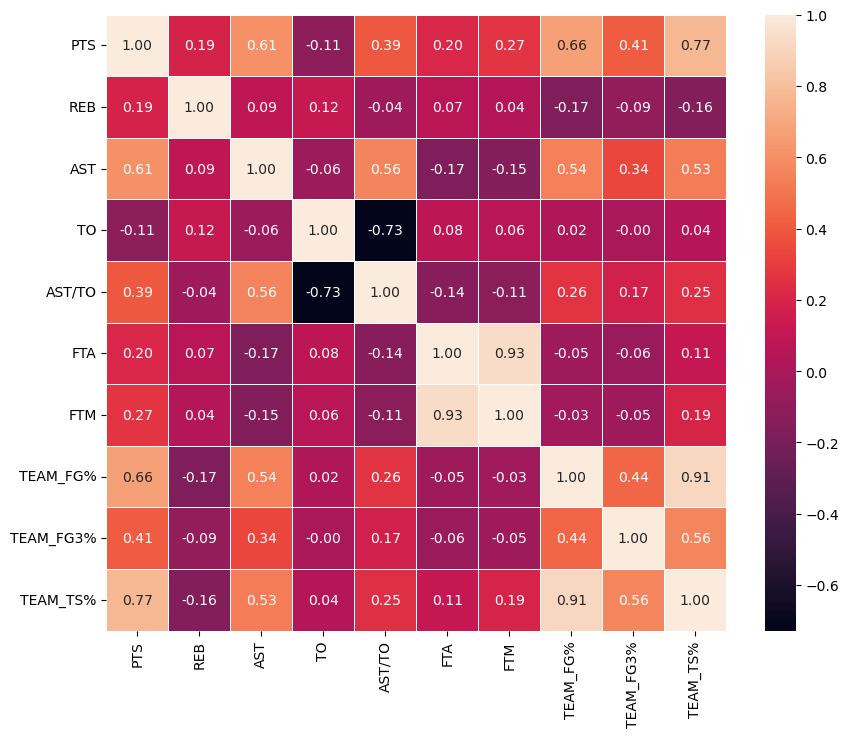

In [24]:
# Creating a correlation matrix for select stats
df3_corr = df3[['GAME_ID', 'TEAM_ID', 'PTS', 'REB', 'AST', 'TO', 'AST/TO', 'FTA', 'FTM', 'TEAM_FG%', 'TEAM_FG3%', 'TEAM_TS%']]
corr0 = df3_corr.corr(method = 'pearson') #selecting pearson correlation method

# Displaying matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr0, annot=True, fmt=".2f", linewidth=.5)
plt.savefig("correlation_matrix.png")

# Regression Model

In [25]:
# Defining x and y variables. Different x variables were trialed and tested, and the model created with these 4 variables simple and to work well
X = df3.loc[:,['TEAM_TS%', 'AST', 'REB', 'FTM']]
y = df3.loc[:,['PTS']]

#Splitting the X and y variables into training and testing sets
X_train,X_test,y_train,y_test = model_selection.train_test_split(X, y, test_size=0.19, random_state=95)

In [26]:
# Creating a Linear Regression model
regressor = LinearRegression()
fit = regressor.fit(X_train, y_train) #fitting linear regression to the training sets

In [27]:
# Calculating the coefficient of determination for our model to see how accurate it is
y_pred = regressor.predict(X_test) #predicting the y value of the testing data X using the fitting above
score = r2_score(y_pred, y_test) #comparing predicted values to the actual values
print("The accuracy of our model is ", score)

The accuracy of our model is  0.6618834240326996


In [28]:
# There are the slope and intercept of the line we computed.
# Beta 0
print(regressor.intercept_)
# Beta 1, 2, 3, 4
print(regressor.coef_)
print('\nOur multiple linear regression model is:\nPTS = -16.9 + (135.9*TS%) + (0.72*AST) + (0.51*REB) + (0.38*FTM)')

[-16.85205309]
[[135.91031016   0.71985947   0.51386931   0.38019952]]

Our multiple linear regression model is:
PTS = -16.9 + (135.9*TS%) + (0.72*AST) + (0.51*REB) + (0.38*FTM)


In [29]:
# Creating a function for our linear regression model
def model(TS, AST, REB, FTM):
    PTS = regressor.intercept_[0] + (regressor.coef_[0][0] * TS) + (regressor.coef_[0][1] * AST) + (regressor.coef_[0][2] * REB) + (regressor.coef_[0][3] * FTM)
    return PTS

# Testing our Model

In [30]:
# Testing different games to see how our model did
# Raptors vs Celtics - December 7, 2007
print('Raptors: ', model(.492, 19, 32, 10))
print('Celtics: ', model(.642, 29, 44, 25))

# Actual Score
# Raptors: 84
# Celtics: 112

Raptors:  83.93896262117065
Celtics:  123.39352836872995


In [31]:
# 76ers vs Heat - February 2, 2018
print('76ers: ', model(.562, 28, 39, 11))
print('Heat: ', model(.493, 20, 49, 17))

# Actual Score
# 76ers: 103
# Heat: 97

76ers:  103.90870428728032
Heat:  96.1919073070908


In [32]:
# Thunder vs Suns - April 2, 2021
print('Thunder: ', model(.52, 19, 38, 18))
print('Suns: ', model(.705, 36, 41, 17))

# Actual Score
# Thunder: 103
# Suns: 140

Thunder:  93.86926330773039
Suns:  132.4116901542833
